# b)


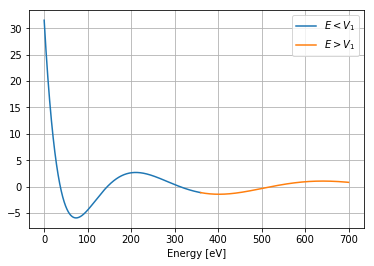

In [40]:
import numpy as np
import matplotlib.pyplot as plt

m0 = 0.511e6    ## eV
c = 299792458  ##  m/s
hbar = 6.5821e-16   ##eV*s
ab = 5.29e-11      ##m
w = 1.5*ab
b = 0.5*ab

### E>V
def f0(E1, v0, v1):
    k1_0 = np.sqrt(2*m0*(E1-v0)/(hbar**2*c**2)) 
    k2_0 = np.sqrt(2*m0*(v1-E1)/(hbar**2*c**2))
    f0 = np.cos(k1_0*w)*np.cosh(k2_0*b) + (k2_0**2 - k1_0**2)/(2*k2_0*k1_0)*np.sin(k1_0*w)*np.sinh(k2_0*b)
    return f0
    
### E<V    
def f1(E2, V0, V1):
    k1_1 = np.sqrt(2*m0*(E2-v0)/(hbar**2*c**2))
    k2_1 = np.sqrt(2*m0*(E2-v1)/(hbar**2*c**2))
    f1 = np.cos(k1_1*w)*np.cos(k2_1*b) - (k2_1**2 + k1_1**2)/(2*k2_1*k1_1)*np.sin(k1_1*w)*np.sin(k2_1*b)
    return f1

v0 = 0
v1 = 360
E1 = np.linspace(0.1, v1-0.1, 3600)
E2 = np.linspace(v1+0.1, 700, 3600)

f_0 = f0(E1, v0, v1)
f_1 = f1(E2, v0, v1)


plt.plot(E1, f_0, label = r'$E<V_1$')
plt.plot(E2, f_1, label = r'$E>V_1$')
plt.xlabel('Energy [eV]')
plt.grid()
plt.legend()

# ci)


/home/alex/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in arccos
  
/home/alex/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in arccos
  import sys
/home/alex/.local/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  


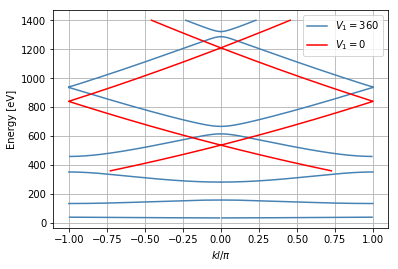

In [3]:
v0 = 0
v1 = 360
E1 = np.linspace(0.1, v1-0.1, 360000)
E2 = np.linspace(v1+0.1, 1400, 36000)

kl1 = np.arccos(f0(E1, v0, v1))/np.pi
kl2 = np.arccos(f1(E2, v0, v1))/np.pi

plt.plot( kl1 ,E1, c = 'steelblue')
plt.plot( -kl1 ,E1, c = 'steelblue')
plt.plot( kl2,E2, c = 'steelblue',  label = r'$V_1 =360$')
plt.plot( -kl2,E2, c = 'steelblue')
plt.ylabel('Energy [eV]')
plt.xlabel(r'$kl/\pi$')

v1 = 0.00001
kl100 = np.arccos(f0(E1, v0, v1))/np.pi
kl200 = np.arccos(f1(E2, v0, v1))/np.pi

plt.plot( kl100 ,E1, c = 'red')
plt.plot( -kl100 ,E1, c = 'red')
plt.plot( kl200, E2, c = 'red',  label = r'$V_1 =0$')
plt.plot( -kl200, E2, c = 'red')
plt.grid()
plt.legend()


c i） The empty lattice represent forbiddent energies, where the energy is not allow in these range. This phenomenon can be found in semiconductor.

# cii)

/home/alex/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.


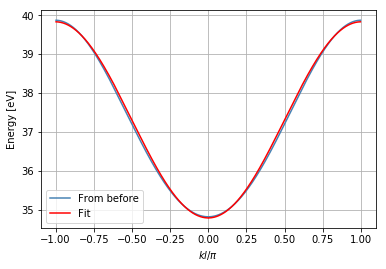

In [27]:
v1 = 360
v0 = 0
E = np.linspace(34, 40, 10000)
kl_low = np.arccos(f0(E, v0, v1))/np.pi

plt.plot(kl_low, E,c = 'steelblue',  label = 'From before')
plt.plot(-kl_low, E,c = 'steelblue')
plt.ylabel('Energy [eV]')
plt.xlabel(r'$kl/\pi$')


E0 = 37.31
t = 1.26
E_cos = E0 - 2*t*np.cos(kl_low*np.pi)
plt.plot(kl_low, E_cos, c = 'red', label = 'Fit')
plt.plot(-kl_low, E_cos, c = 'red')
plt.grid()
plt.legend()

E = np.append(-np.sort(-E[1365:9783]), E[1365:9783])
kl_low = np.sort(np.append(-kl_low[1365: 9783], kl_low[1365:9783]))

# ciii)

Text(0,0.5,'$d^2E/dk^2$')

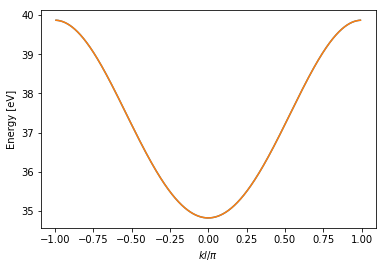

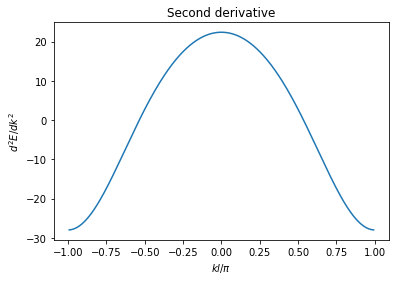

In [30]:
from scipy.interpolate import UnivariateSpline


plt.figure()
plt.plot(kl_low, E)
E_sp = UnivariateSpline(kl_low,E,s=0,k=3)
plt.plot(kl_low, E_sp(kl_low))
plt.xlabel(r'$kl/\pi$')
plt.ylabel('Energy [eV]')
dE2_sp = E_sp.derivative(n = 2)
plt.figure()
plt.title('Second derivative')
plt.plot(kl_low, dE2_sp(kl_low))
plt.xlabel(r'$kl/\pi$')
plt.ylabel(r'$d^2E/dk^2$')

In [39]:
print('Second derivitive at 0: ',max(dE2_sp(kl_low)))
print('Second derivitive at k=pi/l: ',min(dE2_sp(kl_low)))

m_eff0 = hbar**2/max(dE2_sp(kl_low))
m_effp = hbar**2/min(dE2_sp(kl_low))

print('Electron:', m_eff0,' hole:', m_effp)

Second derivitive at 0:  22.371077015078793
Second derivitive at k=pi/l:  -27.98276817421869
Electron: 1.9366095061403733e-32  hole: -1.5482399789851975e-32


Since $$
\frac{d^2E}{dk^2} = \hbar^2/m_h^{eff}
$$
and
$$
\frac{d^2E}{dk^2} = \hbar^2/m_e^{eff}
$$
So $m_{eff} = \hbar^2/\frac{d^2E}{dk^2}$. 

As the result shows, the effective mass of the electrons are larger than the effective mass of the holes in magnitude. The curvature is smaller so the "hole" can move more freely. 